# Data Wrangling and EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_json('ultimate_data_challenge.json')

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


3 columns contain null values : 'avg_rating_of_driver', 'phone', 'avg_rating_by_driver'. Without more information, we will refrain from dropping these columns or filling them arbitrarily with the mean or the median value, as we do not know if that contributes to retention. Note 'avg_rating_of_driver' has over 8000 missing values.

In [5]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [6]:
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


According to Ultimate, a user is considered retained if they were active for the preceding 30 days, so we look at 'last_trip_date' and seek the users who were active for the last month.

In [7]:
df['last_trip_date'].describe()

count                            50000
mean     2014-04-19 08:02:04.992000256
min                2014-01-01 00:00:00
25%                2014-02-14 00:00:00
50%                2014-05-08 00:00:00
75%                2014-06-18 00:00:00
max                2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [8]:
fraction_retained = (df['last_trip_date'] >= '2014-06-01').sum() / len(df)
fraction_retained

0.37608

37.6% of users are considered retained. These users of interest will be our target variable.

In [9]:
df['target'] = (df['last_trip_date'] >= '2014-06-01')

In [10]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,target
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [11]:
df[df['target'] == True].isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      1632
avg_surge                    0
last_trip_date               0
phone                      133
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver        36
target                       0
dtype: int64

Although the number of phone users not using Android or iPhone is small, it's easy to just fill in those null values with 'Other'.

In [12]:
df['phone']=df['phone'].fillna('Other')
df['phone'].value_counts()

phone
iPhone     34582
Android    15022
Other        396
Name: count, dtype: int64

In [13]:
df[df['target'] == True].describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,18804.000000,18804,17172.000000,18804.000000,18804,18804.000000,18804.000000,18804.000000,18768.000000
mean,3.306318,2014-01-16 07:36:11.027440640,4.592930,1.073809,2014-06-20 09:46:31.320995584,9.152797,61.389034,5.114788,4.762772
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-06-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-06-14 00:00:00,0.000000,44.400000,2.560000,4.700000
50%,2.000000,2014-01-17 00:00:00,4.800000,1.000000,2014-06-22 00:00:00,0.000000,64.300000,3.730000,4.800000
75%,4.000000,2014-01-24 00:00:00,5.000000,1.090000,2014-06-28 00:00:00,13.300000,84.600000,5.890000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,4.500000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,4.986743,NaN,0.542386,0.163170,NaN,15.588704,29.487584,4.615175,0.328489


We look at the correlation heatmap with our target variable with the numerical features.

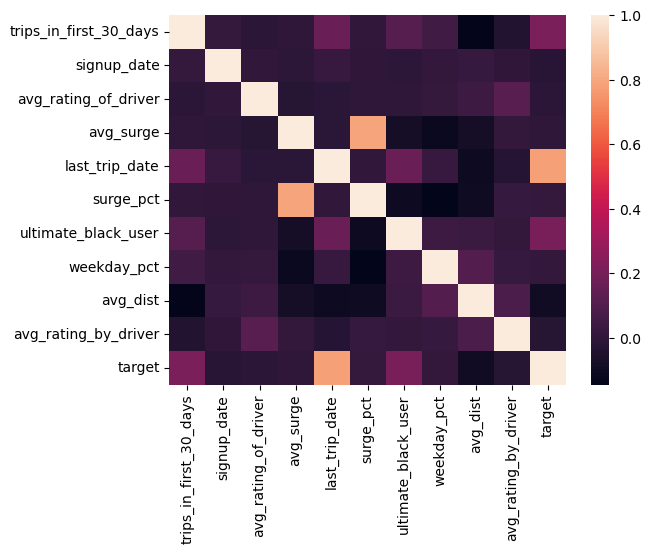

In [14]:
fig = plt.figure()
corr = df.drop(['city','phone'],axis=1).corr()
ax = sns.heatmap(corr)
plt.show()

In [15]:
corr['target'].sort_values(ascending=False)

target                    1.000000
last_trip_date            0.780837
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
signup_date              -0.020211
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: target, dtype: float64

Our variable is created from 'last_trip_date', so we need to ignore the high correlation for now until we create our features dataframe.

We will one hot encode the categorical variables.

In [16]:
df=pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])

In [17]:
df.columns

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'target', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_Other', 'phone_iPhone',
       'ultimate_black_user_False', 'ultimate_black_user_True'],
      dtype='object')

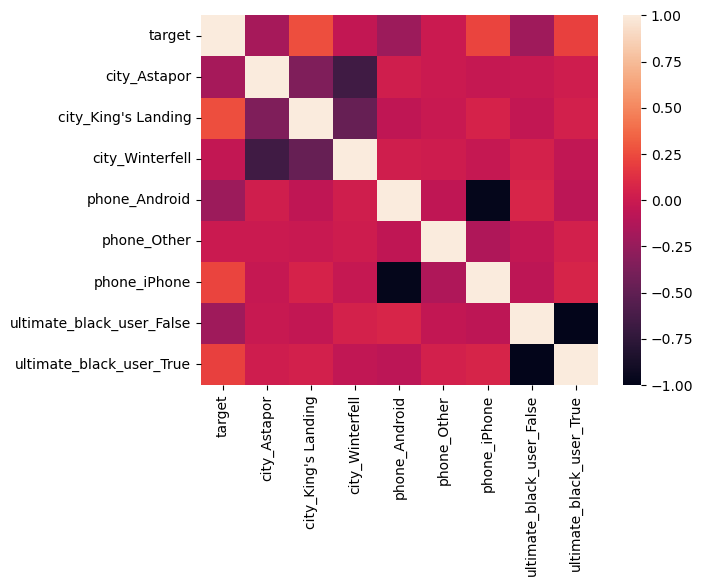

In [18]:
categories = df[['target', 'city_Astapor', "city_King's Landing",
       'city_Winterfell', 'phone_Android', 'phone_Other', 'phone_iPhone',
       'ultimate_black_user_False', 'ultimate_black_user_True']]
fig = plt.figure()
corr = categories.corr()
ax = sns.heatmap(corr)
plt.show()

In [19]:
corr['target'].sort_values(ascending=False)

target                       1.000000
city_King's Landing          0.262284
phone_iPhone                 0.225244
ultimate_black_user_True     0.205002
phone_Other                 -0.007419
city_Winterfell             -0.046611
city_Astapor                -0.174655
ultimate_black_user_False   -0.205002
phone_Android               -0.225464
Name: target, dtype: float64

In [20]:
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   trips_in_first_30_days     50000 non-null  int64         
 1   signup_date                50000 non-null  datetime64[ns]
 2   avg_rating_of_driver       41878 non-null  float64       
 3   avg_surge                  50000 non-null  float64       
 4   last_trip_date             50000 non-null  datetime64[ns]
 5   surge_pct                  50000 non-null  float64       
 6   weekday_pct                50000 non-null  float64       
 7   avg_dist                   50000 non-null  float64       
 8   avg_rating_by_driver       49799 non-null  float64       
 9   target                     50000 non-null  bool          
 10  city_Astapor               50000 non-null  bool          
 11  city_King's Landing        50000 non-null  bool          
 12  city_Wint

Before moving onto modeling, since 'avg_rating_of_driver' and 'avg_rating_by_driver' still have NA values, but have low correlation and are a small percentage of the overall, we choose the median rating as the interpolation.

In [22]:
df.isna().sum()/df.count()

trips_in_first_30_days       0.000000
signup_date                  0.000000
avg_rating_of_driver         0.193944
avg_surge                    0.000000
last_trip_date               0.000000
surge_pct                    0.000000
weekday_pct                  0.000000
avg_dist                     0.000000
avg_rating_by_driver         0.004036
target                       0.000000
city_Astapor                 0.000000
city_King's Landing          0.000000
city_Winterfell              0.000000
phone_Android                0.000000
phone_Other                  0.000000
phone_iPhone                 0.000000
ultimate_black_user_False    0.000000
ultimate_black_user_True     0.000000
dtype: float64

In [23]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

# Modeling

Since are target variable is binary, it makes sense to use Logistic Regression as a predictive model.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [25]:
y = df['target']
X = df.drop(['target','signup_date','last_trip_date'],axis=1)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3,random_state=123)

In [27]:
logit = LogisticRegression()
param_grid = {'C':np.arange(0.5,5.1,0.1)}
grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [28]:
logit_coef = LogisticRegression(C=grid.best_estimator_.C)
logit_coef.fit(X_train,y_train)
df_coef = pd.DataFrame(zip(list(X.columns),logit_coef.coef_[0]),index=range(X.columns.shape[0]),columns=['feature','coefficient'])
df_coef.sort_values('coefficient',ascending=False)

,feature,coefficient
0,trips_in_first_30_days,0.444465
8,city_King's Landing,0.433283
12,phone_iPhone,0.251940
14,ultimate_black_user_True,0.212703
3,surge_pct,0.076911
4,weekday_pct,0.003438
11,phone_Other,0.001677
2,avg_surge,-0.034324
9,city_Winterfell,-0.067546
6,avg_rating_by_driver,-0.069025


In [29]:
np.mean(cross_val_score(grid,X_test,y_test))

0.716

In [30]:
y_pred = grid.predict(X_test)

In [31]:
confusion_matrix(y_test,y_pred)

array([[7981, 1323],
       [2913, 2783]], dtype=int64)

In [32]:
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(0.7117894508218102, 0.7176, 0.7058110527124054, None)

The logistic regression returned an mean cross validation score of 71.6% accuracy. Let's try a different model to see if we can get this better.

In [33]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [34]:
np.mean(cross_val_score(rf,X_test,y_test,cv=5))

0.7575333333333333

In [35]:
df_importance = pd.DataFrame(zip(list(X.columns),rf.feature_importances_),index=range(X.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.298950
4,weekday_pct,0.130833
6,avg_rating_by_driver,0.114551
0,trips_in_first_30_days,0.082637
1,avg_rating_of_driver,0.080946
3,surge_pct,0.079005
2,avg_surge,0.065218
8,city_King's Landing,0.047736
10,phone_Android,0.020919
12,phone_iPhone,0.018160


In [36]:
confusion_matrix(y_test,y_pred)

array([[7609, 1695],
       [1955, 3741]], dtype=int64)

In [37]:
y_pred = rf.predict(X_test)

In [38]:
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(0.7548051052373552, 0.7566666666666667, 0.7555015689435386, None)

The random forest model had a better accuracy of 75.7% as well as other measures of performance based on the confusion matrix. We will use the random forst model and its ordering of important features to find the top 5 most relevant features to user retention, but also compare the coefficients from the logistic regression model.

1. 'avg_dist': "the average distance in miles per trip taken in the first 30 days after signup". The random forest model considers this to be the most important feature. There is a negative correlation in our logistic regression model. Perhaps those who are not retained will only use the service on long trips as a last resort instead of public transportation.

2. 'weekday_pct': "the percent of the user’s trips occurring during a weekday". There is a postive correlation. This may point to retained users using the service on their work commute.

3. 'avg_rating_by_driver': "the rider’s average rating over all of their trips". Both rating features are slightly negatively correlated. There may not be too much insight in these features other than the implication that the most active users would also be the most interactive with the service.

4. 'trips_in_first_30_days': "the number of trips this user took in the first 30 days after signing up". This is the highest positive correlation. Perhaps using the service and enjoying it in the beginning plays a large role in retention.

5. 'avg_rating_of_driver': "the rider’s average rating of their drivers over all of their trips".

We make the following recommendations based what our models considered to be the most important features:

1. Offer incentives for the first 30 days to get new users to take more trips and have the service become normalized to their routine.
2. Make short to medium during the weekday an attractive option for the service (not recommended long term for commutes as this generates a lot of traffic).
3. Encourage drivers make the service more personable, as personally invested users seem to want to interact, even if the review is not perfect.